In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from sklearn.model_selection import train_test_split

# Load the CIFAR10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Convert pixel values to float and normalize them between 0 and 1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convert labels to one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

# Split the training set into new training and validation sets
x_train_new, x_val, y_train_new, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# Print the shapes of the datasets
print("Training set shape:", x_train_new.shape)
print("Validation set shape:", x_val.shape)
print("Testing set shape:", x_test.shape)

170498071/170498071 [==============================] - 16s 0us/step
Training set shape: (40000, 32, 32, 3)
Validation set shape: (10000, 32, 32, 3)
Testing set shape: (10000, 32, 32, 3)


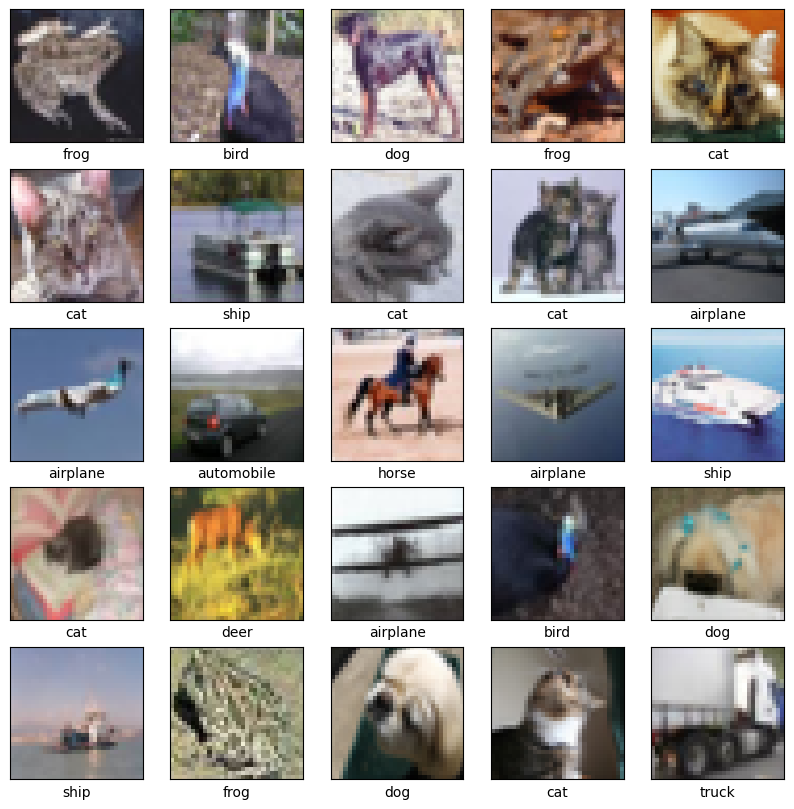

In [2]:
import matplotlib.pyplot as plt
# Define the plot_data() function
def plot_data(x_data, y_data):
    y_label = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
    plt.figure(figsize=(10, 10))
    for i in range(25):
        plt.subplot(5, 5, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(x_data[i])
        # The CIFAR labels happen to be arrays, 
        # which is why you need the extra index
        plt.xlabel(y_label[y_data[i].argmax()])
    plt.show()

# Call the plot_data() function to visualize the data
plot_data(x_train_new, y_train_new)

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

# Build the MLP model (mlp_1)
mlp_1 = Sequential()
mlp_1.add(Flatten(input_shape=(32, 32, 3)))  # Flatten the input
mlp_1.add(Dense(512, activation='sigmoid'))
mlp_1.add(Dense(10, activation='softmax'))

# Compile the model
mlp_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
mlp_1.summary()

# Train the MLP model (mlp_1)
mlp_1_history = mlp_1.fit(x_train_new, y_train_new, validation_data=(x_val, y_val), batch_size=32, epochs=5)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 512)               1573376   
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 1578506 (6.02 MB)
Trainable params: 1578506 (6.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/5
1250/1250 [==============================] - 20s 16ms/step - loss: 1.9175 - accuracy: 0.3142 - val_loss: 1.8110 - val_accuracy: 0.3632
Epoch 2/5
1250/1250 [==============================] - 20s 16ms/step - loss: 1.7642 - accuracy: 0.3688 - val_loss: 1.7070 - val_accuracy:

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

# Build the MLP model (mlp_2)
mlp_2 = Sequential()
mlp_2.add(Flatten(input_shape=(32, 32, 3)))  # Flatten the input
mlp_2.add(Dense(512, activation='sigmoid'))
mlp_2.add(Dense(512, activation='sigmoid'))
mlp_2.add(Dense(256, activation='sigmoid'))  # Adding an additional Dense layer with 256 units
mlp_2.add(Dense(10, activation='softmax'))

# Compile the model
mlp_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
mlp_2.summary()

# Train the MLP model
mlp_2_history = mlp_2.fit(x_train_new, y_train_new, validation_data=(x_val, y_val), batch_size=32, epochs=5)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 3072)              0         
                                                                 
 dense_2 (Dense)             (None, 512)               1573376   
                                                                 
 dense_3 (Dense)             (None, 512)               262656    
                                                                 
 dense_4 (Dense)             (None, 256)               131328    
                                                                 
 dense_5 (Dense)             (None, 10)                2570      
                                                                 
Total params: 1969930 (7.51 MB)
Trainable params: 1969930 (7.51 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/5
1250/1

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

# Build the MLP model
mlp_model = Sequential()
mlp_model.add(Flatten(input_shape=(32, 32, 3)))  # Flatten the input
mlp_model.add(Dense(512, activation='sigmoid'))
mlp_model.add(Dense(512, activation='sigmoid'))
mlp_model.add(Dense(10, activation='softmax'))

# Compile the model
mlp_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
mlp_model.summary()

# Train the MLP model
mlp_history = mlp_model.fit(x_train_new, y_train_new, validation_data=(x_val, y_val), batch_size=32, epochs=5)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 3072)              0         
                                                                 
 dense_6 (Dense)             (None, 512)               1573376   
                                                                 
 dense_7 (Dense)             (None, 512)               262656    
                                                                 
 dense_8 (Dense)             (None, 10)                5130      
                                                                 
Total params: 1841162 (7.02 MB)
Trainable params: 1841162 (7.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/5
1250/1250 [==============================] - 23s 18ms/step - loss: 1.9205 - accuracy: 0.2989 - val_loss: 1.8201 - val_accuracy: 0.3453
Epo

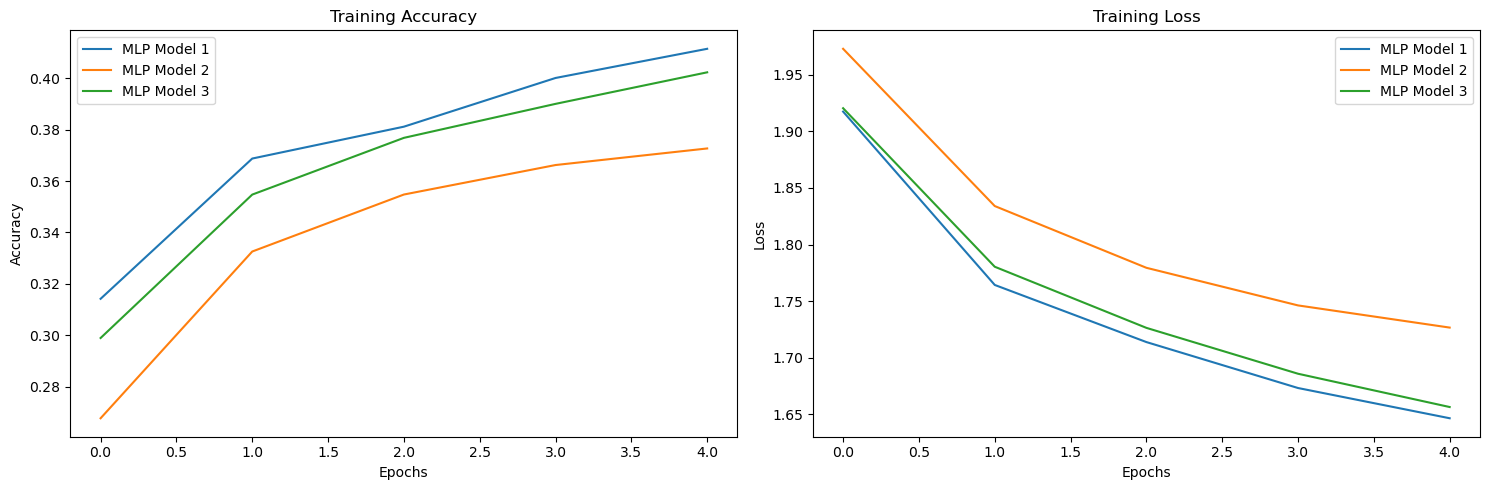

In [6]:
import matplotlib.pyplot as plt

# Plotting the training history for accuracy
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(mlp_1_history.history['accuracy'], label='MLP Model 1')
plt.plot(mlp_2_history.history['accuracy'], label='MLP Model 2')
plt.plot(mlp_history.history['accuracy'], label='MLP Model 3')
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plotting the training history for loss
plt.subplot(1, 2, 2)
plt.plot(mlp_1_history.history['loss'], label='MLP Model 1')
plt.plot(mlp_2_history.history['loss'], label='MLP Model 2')
plt.plot(mlp_history.history['loss'], label='MLP Model 3')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

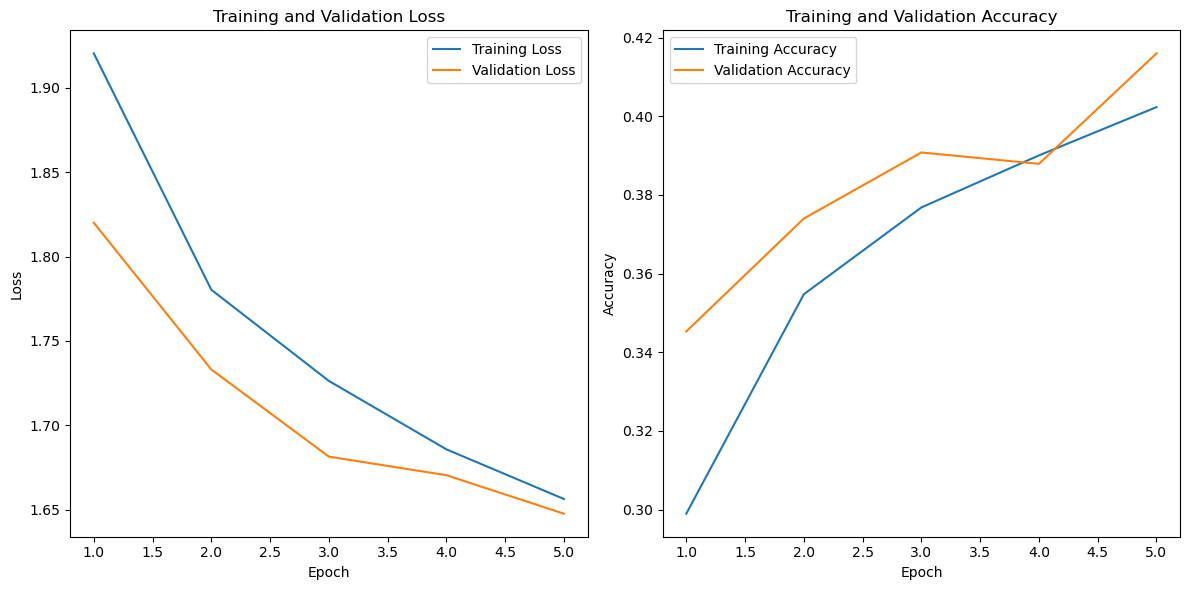

In [7]:
# Access training and validation history
training_loss = mlp_history.history['loss']
validation_loss = mlp_history.history['val_loss']
training_accuracy = mlp_history.history['accuracy']
validation_accuracy = mlp_history.history['val_accuracy']

# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(1, 6), training_loss, label='Training Loss')
plt.plot(range(1, 6), validation_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(range(1, 6), training_accuracy, label='Training Accuracy')
plt.plot(range(1, 6), validation_accuracy, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.tight_layout()  # Ensures proper spacing between subplots
plt.show()

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten

# Build the CNN model
cnn_model = Sequential()
cnn_model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3)))
cnn_model.add(Conv2D(64, (3, 3), activation='relu'))
cnn_model.add(Flatten())
cnn_model.add(Dense(512, activation='sigmoid'))
cnn_model.add(Dense(512, activation='sigmoid'))
cnn_model.add(Dense(10, activation='softmax'))

# Compile the model
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
cnn_model.summary()

# Train the CNN model
cnn_history = cnn_model.fit(x_train_new, y_train_new, validation_data=(x_val, y_val), batch_size=32, epochs=5)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 64)        1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        36928     
                                                                 
 flatten_3 (Flatten)         (None, 50176)             0         
                                                                 
 dense_9 (Dense)             (None, 512)               25690624  
                                                                 
 dense_10 (Dense)            (None, 512)               262656    
                                                                 
 dense_11 (Dense)            (None, 10)                5130      
                                                                 
Total params: 25997130 (99.17 MB)
Trainable params: 25

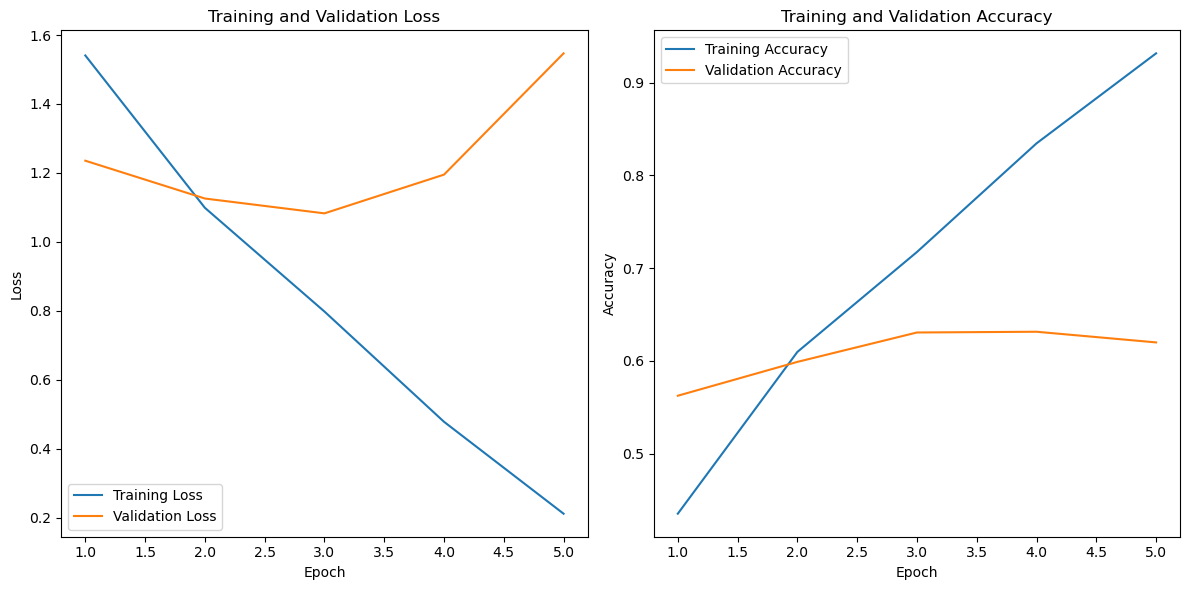

In [9]:
import matplotlib.pyplot as plt

# Access training and validation history
training_loss = cnn_history.history['loss']
validation_loss = cnn_history.history['val_loss']
training_accuracy = cnn_history.history['accuracy']
validation_accuracy = cnn_history.history['val_accuracy']

# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(1, 6), training_loss, label='Training Loss')
plt.plot(range(1, 6), validation_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(range(1, 6), training_accuracy, label='Training Accuracy')
plt.plot(range(1, 6), validation_accuracy, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.tight_layout()  # Ensures proper spacing between subplots
plt.show()


In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

# Build the CNN model
cnn_model2 = Sequential()
cnn_model2.add(Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3)))
cnn_model2.add(MaxPooling2D((2, 2)))
cnn_model2.add(Conv2D(64, (3, 3), activation='relu'))
cnn_model2.add(MaxPooling2D((2, 2)))
cnn_model2.add(Flatten())
cnn_model2.add(Dense(512, activation='sigmoid'))
cnn_model2.add(Dropout(0.2))
cnn_model2.add(Dense(512, activation='sigmoid'))
cnn_model2.add(Dropout(0.2))
cnn_model2.add(Dense(10, activation='softmax'))

# Compile the model
cnn_model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
cnn_model2.summary()

# Train the CNN model
cnn_history2 = cnn_model2.fit(x_train_new, y_train_new, validation_data=(x_val, y_val), batch_size=32, epochs=5)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 30, 30, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 64)        0         
 D)                                                              
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 flatten_4 (Flatten)         (None, 2304)              0         
                                                                 
 dense_12 (Dense)            (None, 512)              

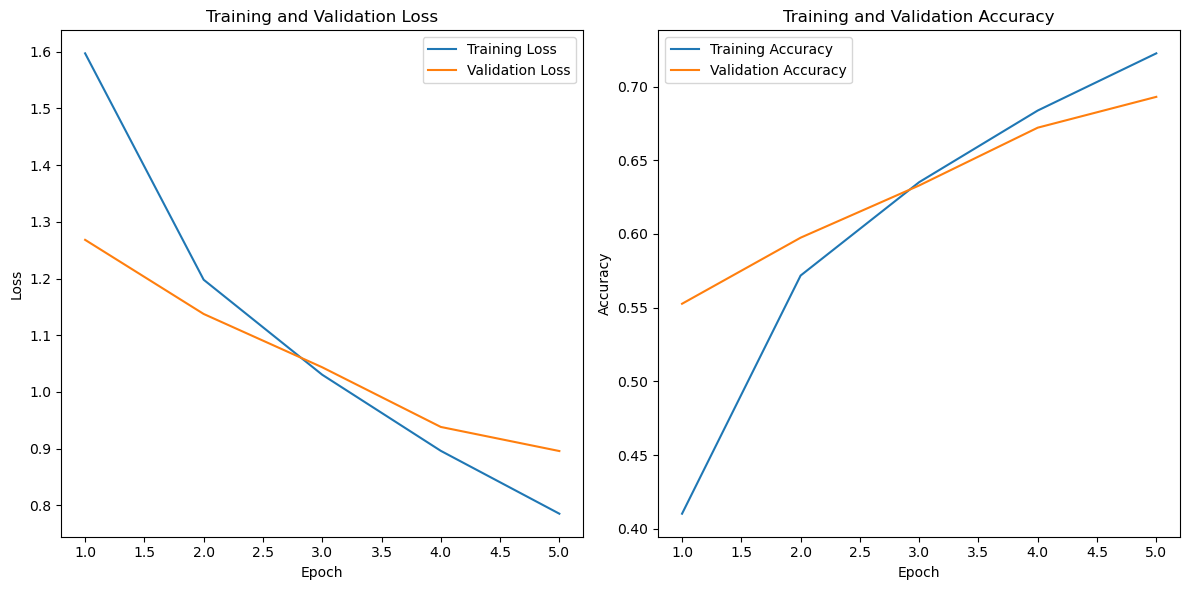

In [17]:
import matplotlib.pyplot as plt

# Access training and validation history
training_loss = cnn_history2.history['loss']
validation_loss = cnn_history2.history['val_loss']
training_accuracy = cnn_history2.history['accuracy']
validation_accuracy = cnn_history2.history['val_accuracy']

# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(1, 6), training_loss, label='Training Loss')
plt.plot(range(1, 6), validation_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(range(1, 6), training_accuracy, label='Training Accuracy')
plt.plot(range(1, 6), validation_accuracy, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.tight_layout()  # Ensures proper spacing between subplots
plt.show()


In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

# Build the CNN model
cnn_model_better = Sequential()
cnn_model_better.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
cnn_model_better.add(MaxPooling2D((2, 2)))
cnn_model_better.add(Conv2D(64, (3, 3), activation='relu'))
cnn_model_better.add(MaxPooling2D((2, 2)))
cnn_model_better.add(Conv2D(128, (3, 3), activation='relu'))
cnn_model_better.add(MaxPooling2D((2, 2)))
cnn_model_better.add(Flatten())
cnn_model_better.add(Dense(512, activation='relu'))
cnn_model_better.add(Dropout(0.2))
cnn_model_better.add(Dense(512, activation='relu'))
cnn_model_better.add(Dropout(0.2))
cnn_model_better.add(Dense(10, activation='softmax'))

# Compile the model
cnn_model_better.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
cnn_model_better.summary()
cnn_history_better = cnn_model_better.fit(x_train_new, y_train_new, validation_data=(x_val, y_val), batch_size=32, epochs=5)

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 15, 15, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_16 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 6, 6, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_17 (Conv2D)          (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 2, 2, 128)        

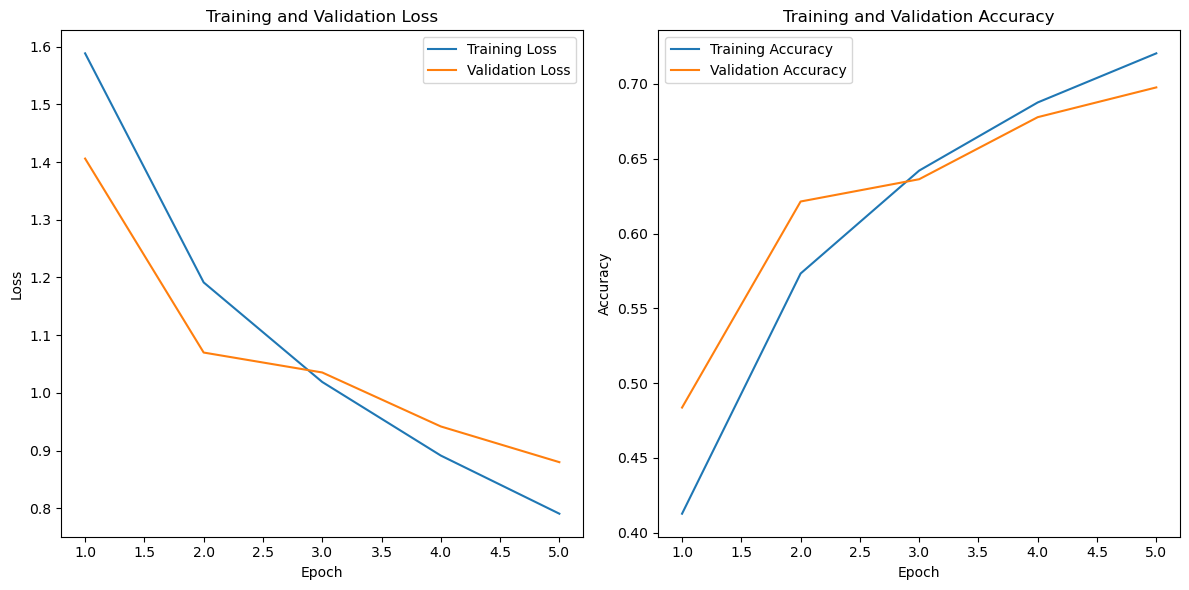

In [18]:
import matplotlib.pyplot as plt

# Access training and validation history
training_loss = cnn_history_better.history['loss']
validation_loss = cnn_history_better.history['val_loss']
training_accuracy = cnn_history_better.history['accuracy']
validation_accuracy = cnn_history_better.history['val_accuracy']

# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(1, 6), training_loss, label='Training Loss')
plt.plot(range(1, 6), validation_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(range(1, 6), training_accuracy, label='Training Accuracy')
plt.plot(range(1, 6), validation_accuracy, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.tight_layout()  # Ensures proper spacing between subplots
plt.show()


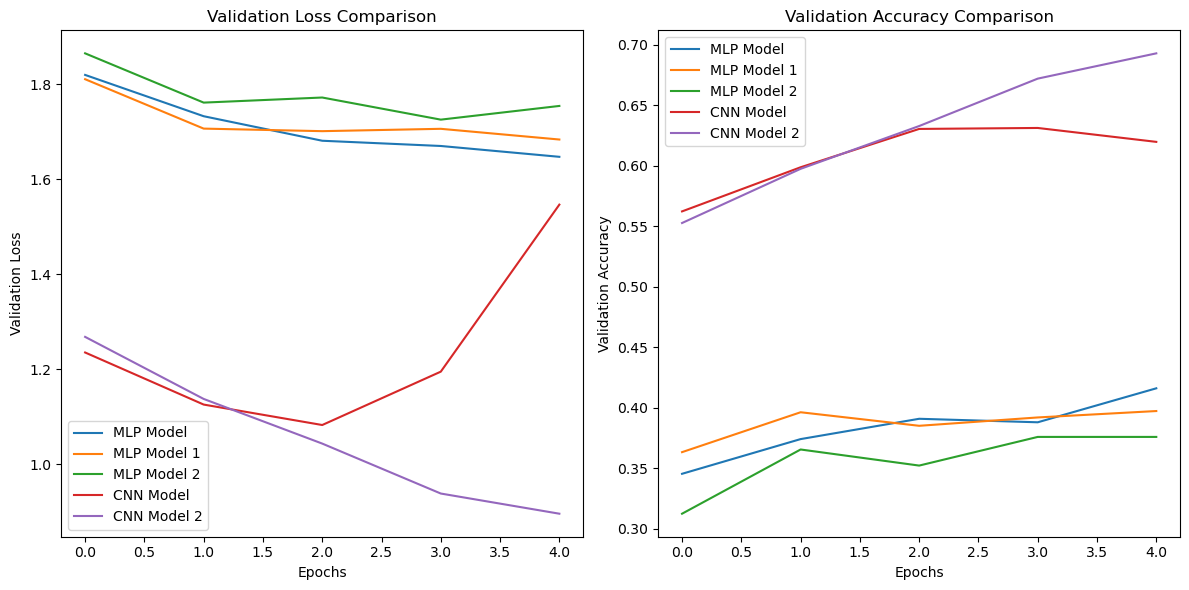

In [19]:
# Plotting validation loss comparison
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(mlp_history.history['val_loss'], label='MLP Model')
plt.plot(mlp_1_history.history['val_loss'], label='MLP Model 1')
plt.plot(mlp_2_history.history['val_loss'], label='MLP Model 2')
plt.plot(cnn_history.history['val_loss'], label='CNN Model')
plt.plot(cnn_history2.history['val_loss'], label='CNN Model 2')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.title('Validation Loss Comparison')
plt.legend()

# Plotting validation accuracy comparison
plt.subplot(1, 2, 2)
plt.plot(mlp_history.history['val_accuracy'], label='MLP Model')
plt.plot(mlp_1_history.history['val_accuracy'], label='MLP Model 1')
plt.plot(mlp_2_history.history['val_accuracy'], label='MLP Model 2')
plt.plot(cnn_history.history['val_accuracy'], label='CNN Model')
plt.plot(cnn_history2.history['val_accuracy'], label='CNN Model 2')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy Comparison')
plt.legend()

plt.tight_layout()
plt.show()
